In [ ]:
# How did passenger experience (measured by delays and journey time performance) change over subway lines and time?


In [1]:
# imports for data analysis
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# import the data
mta1 = pd.read_csv("./data/MTA_Subway_Customer_Metrics_2020-2024.csv")
mta2 = pd.read_csv("./data/MTA_Subway_Customer_Metrics__2015-2019.csv")
mta = pd.concat([mta1, mta2])

In [35]:
# view the first lines of data
mta.head(10)

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685
5,2024-12-01,A DIVISION,3,peak,2867204.8,0.959497,0.428210,2751075.0,1227766.2,305835.66,0.106667,0.893333
6,2024-12-01,A DIVISION,4,offpeak,4061860.5,0.936306,0.360165,3803145.2,1462940.0,541052.40,0.133203,0.866797
7,2024-12-01,A DIVISION,4,peak,4294458.0,0.932414,0.369444,4004213.5,1586562.2,524842.25,0.122214,0.877786
8,2024-12-01,A DIVISION,5,offpeak,2769309.5,1.218507,0.621453,3374423.0,1720994.5,398652.22,0.143954,0.856046
9,2024-12-01,A DIVISION,5,peak,3658115.2,1.073862,0.325576,3928312.0,1190993.6,463947.56,0.126827,0.873173


In [36]:
# get descriptive information about the data set
mta.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,4.904000e+03,4904.000000,4904.000000,4.904000e+03,4.904000e+03,4.904000e+03,4904.000000,4904.000000
mean,3.025368e+06,1.216647,0.582427,3.820950e+06,2.530806e+06,5.101031e+05,0.154659,0.845341
std,2.001735e+06,0.432453,0.660826,2.645809e+06,3.215245e+06,3.975647e+05,0.065932,0.065932
min,3.017300e+03,-0.431496,-2.213688,-7.396448e+03,-3.060992e+06,0.000000e+00,0.000000,0.619272
25%,1.449064e+06,0.948721,0.152835,1.699487e+06,2.176745e+05,2.023312e+05,0.110594,0.796599
50%,2.819480e+06,1.195069,0.518339,3.704139e+06,1.438770e+06,4.501899e+05,0.157206,0.842794
75%,4.378101e+06,1.475829,0.939098,5.582262e+06,3.556795e+06,7.423213e+05,0.203401,0.889406
max,1.018307e+07,3.506892,3.048787,1.858170e+07,1.879770e+07,2.326756e+06,0.380728,1.000000


In [37]:
# get information about the data
mta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 0 to 2047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   month                              4904 non-null   object 
 1   division                           4904 non-null   object 
 2   line                               4904 non-null   object 
 3   period                             4904 non-null   object 
 4   num_passengers                     4904 non-null   float64
 5   additional platform time           4904 non-null   float64
 6   additional train time              4904 non-null   float64
 7   total_apt                          4904 non-null   float64
 8   total_att                          4904 non-null   float64
 9   over_five_mins                     4904 non-null   float64
 10  over_five_mins_perc                4904 non-null   float64
 11  customer journey time performance  4904 non-null   float64
dt

In [38]:
# check for null values
mta.isnull().sum()

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

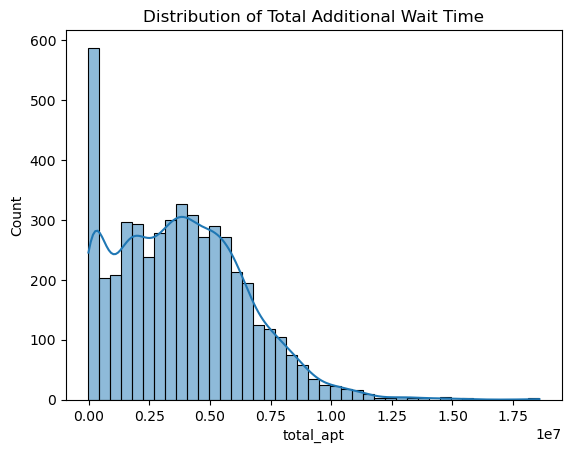

In [40]:
# Distribution of train arrival wait times
sns.histplot(mta['total_apt'], kde=True)
plt.title('Distribution of Total Additional Wait Time')
plt.show()

In [41]:
# change the month column to datetime type for easier grouping
mta['month'] = pd.to_datetime(mta['month'])

In [42]:
# create a new column to hold just the year
mta['year'] = mta['month'].dt.year

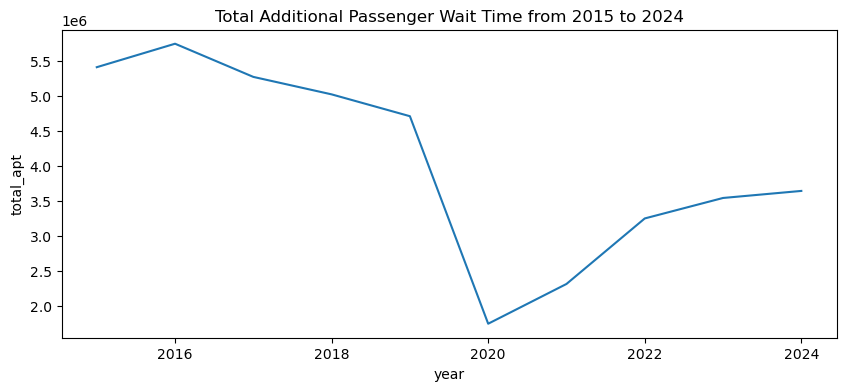

In [52]:
# Train arrival wait times over the months (in minutes)
plt.figure(figsize=(10, 4))
mta_monthly = mta.groupby('year').mean(numeric_only=True).reset_index()

sns.lineplot(data=mta_monthly, x="year", y="total_apt")
plt.title("Total Additional Passenger Wait Time from 2015 to 2024")
plt.show()

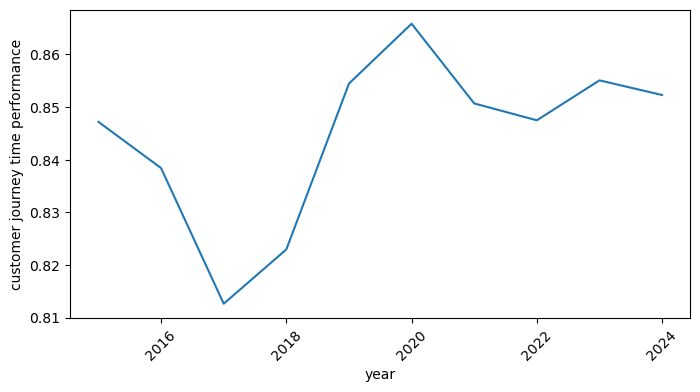

In [ ]:
# Customer Journey time performance over the years of 2015 to 2024
# customer journey is "the estimated percentage of customers whose journeys are completed within 5mins of scheduled time" (from data.ny.gov)
mta_monthly = mta.groupby('year').mean(numeric_only=True).reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot( data=mta_monthly, x='year', y='customer journey time performance')
plt.xticks(rotation=45)
plt.show()

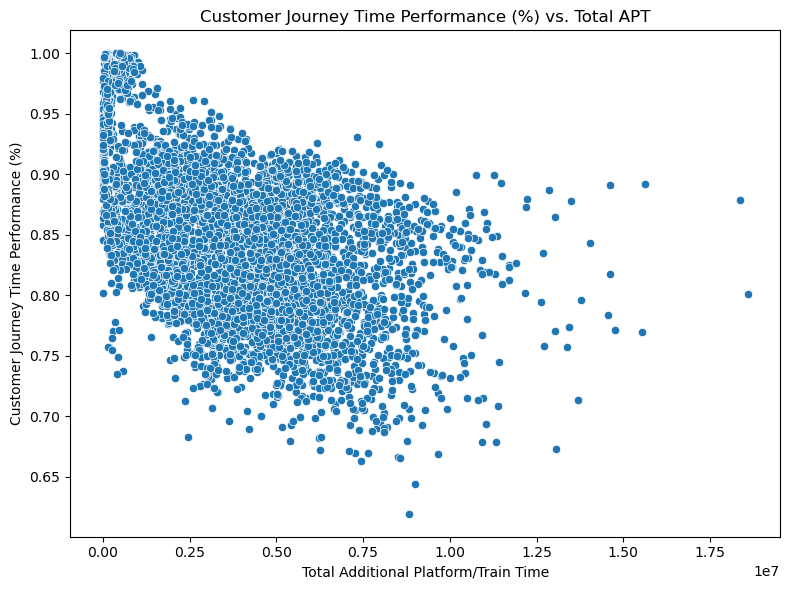

In [84]:
# scatterplot for total_apt and customer journey time performance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mta, x='total_apt', y='customer journey time performance')
plt.title('Customer Journey Time Performance (%) vs. Total APT')
plt.xlabel('Total Additional Platform/Train Time')
plt.ylabel('Customer Journey Time Performance (%)')
plt.tight_layout()
plt.show()

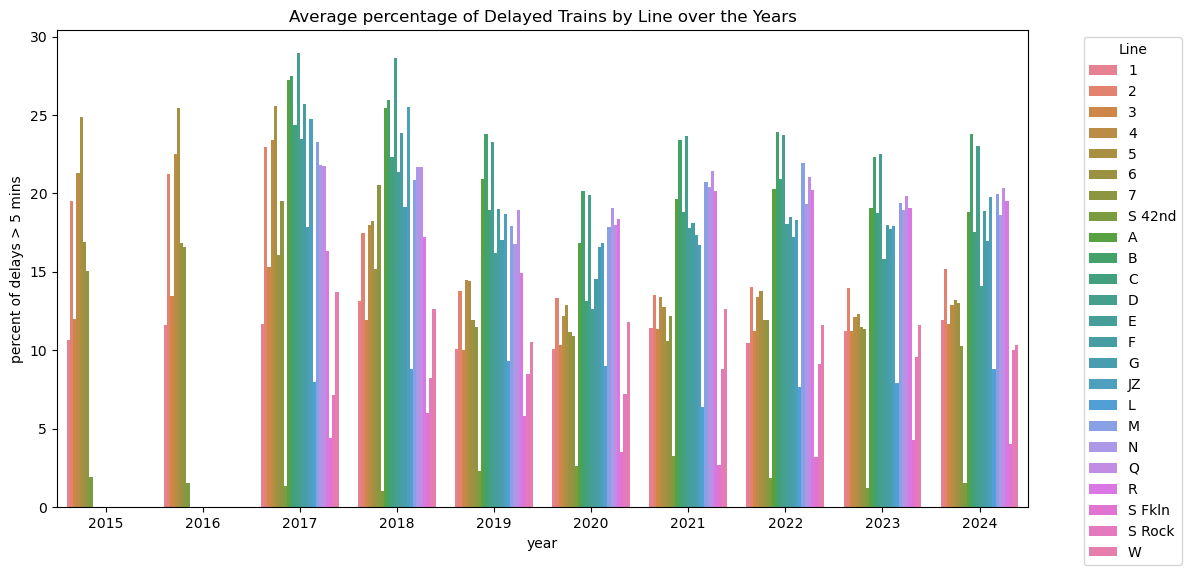

In [ ]:
# percentage of late time arrivals by line over the years
late_by_lines = mta.groupby(['year', 'line'])['over_five_mins_perc'].mean().reset_index()
late_by_lines['over_five_mins_perc'] = late_by_lines['over_five_mins_perc'] *100 #to covert fraction into whole numbers

plt.figure(figsize=(12,6))
sns.barplot(data=late_by_lines, x='year', y='over_five_mins_perc', hue='line')

plt.title('Average percentage of Delayed Trains by Line over the Years')
plt.ylabel('percent of delays > 5 mins')
plt.legend(title='Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

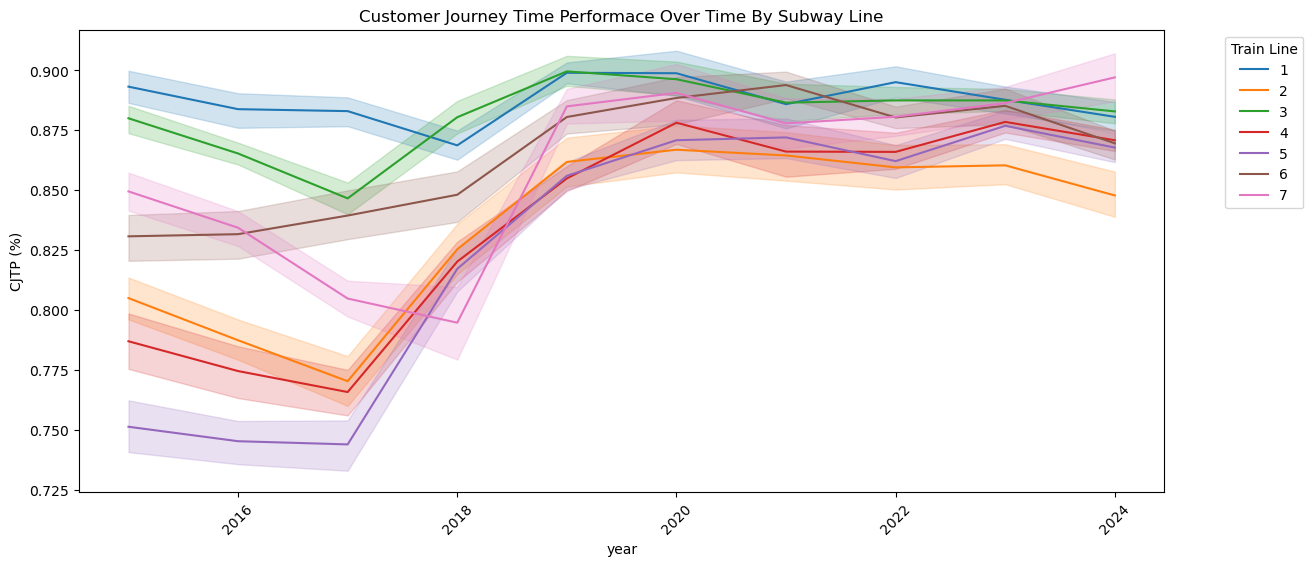

In [81]:
# customer journey by numbered lines over the years
plt.figure(figsize=(14, 6))
lines = [ "1", "2", "3", "4", "5", "6", "7" ]
filtered_lines = mta[mta["line"].isin(lines)]
sns.lineplot(data=filtered_lines, x='year', y='customer journey time performance', hue='line')
plt.title("Customer Journey Time Performace Over Time By Subway Line")
plt.ylabel("CJTP (%)")
plt.xticks(rotation=45)
plt.legend(title='Train Line', bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

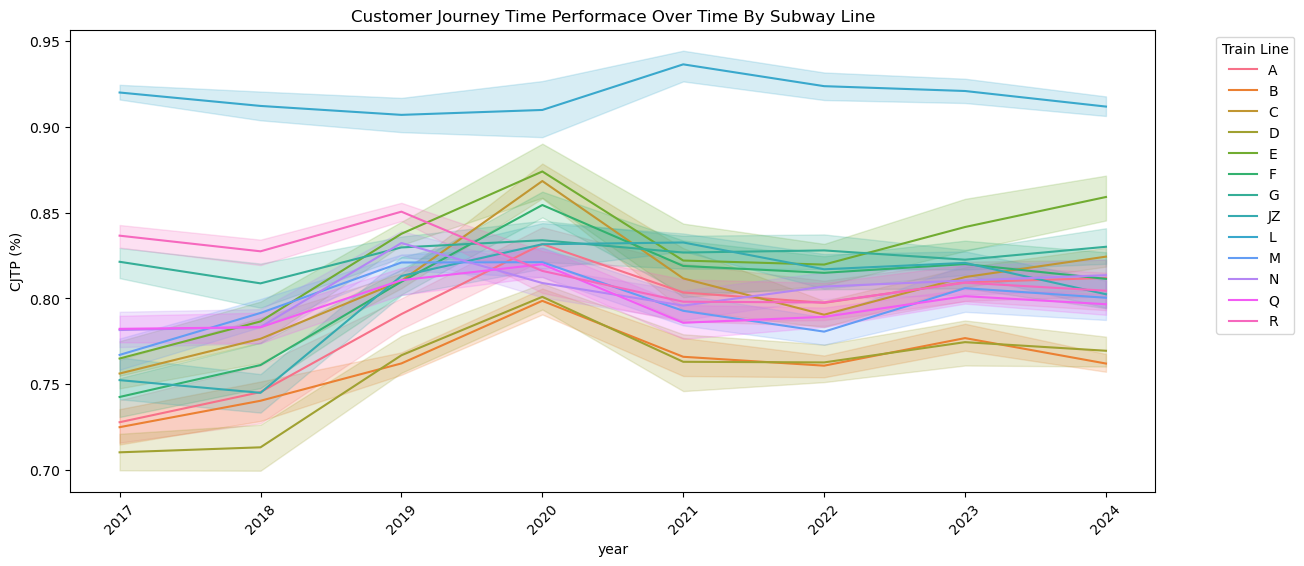

In [83]:
# customer journey by lettered lines over the years
plt.figure(figsize=(14, 6))
lines = [ "A", "B", "C", "D", "E", "F", "G", "JZ", "M", "Q", "R", "N", "L" ]
filtered_lines = mta[mta["line"].isin(lines)]
sns.lineplot(data=filtered_lines, x='year', y='customer journey time performance', hue='line')
plt.title("Customer Journey Time Performace Over Time By Subway Line")
plt.ylabel("CJTP (%)")
plt.xticks(rotation=45)
plt.legend(title='Train Line', bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

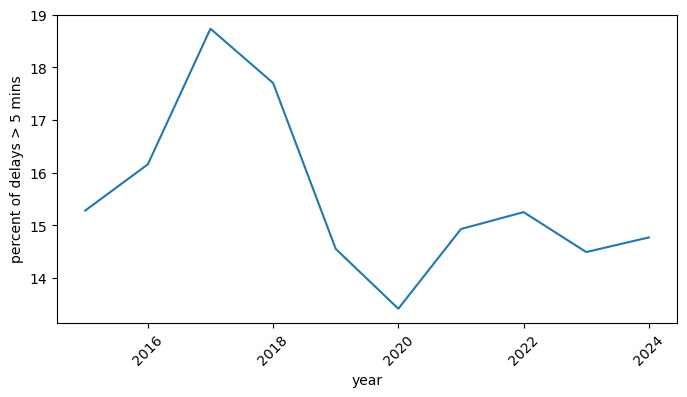

In [ ]:
# percentage of delays over five mins throughout the years

mta_monthly = mta.groupby('year').mean(numeric_only=True).reset_index()
mta_monthly['over_five_mins_perc'] = mta_monthly['over_five_mins_perc'] *100

plt.figure(figsize=(8, 4))
sns.lineplot( data=mta_monthly, x='year', y='over_five_mins_perc')
plt.xticks(rotation=45)
plt.ylabel('percent of delays > 5 mins')
plt.show()

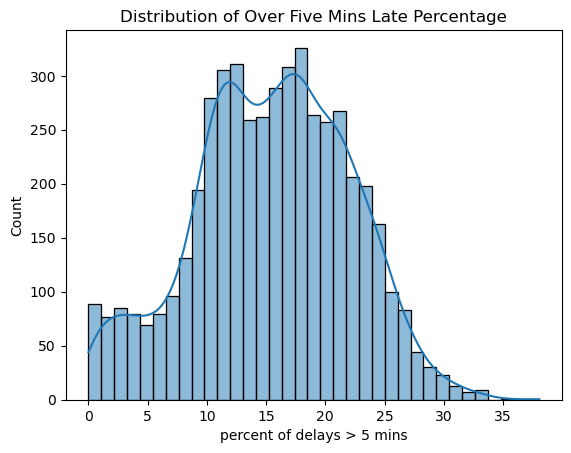

In [71]:
# distribution of over five mins perc
sns.histplot(mta['over_five_mins_perc']*100, kde=True)
plt.title('Distribution of Over Five Mins Late Percentage')
plt.xlabel('percent of delays > 5 mins')
plt.show()

In [66]:
# Looking at the relationship between customer journey time performance, total apt, and over five mins perc
corr = mta[['customer journey time performance', 'total_apt', 'over_five_mins_perc']].corr()
corr

,customer journey time performance,total_apt,over_five_mins_perc
customer journey time performance,1.000000,-0.537409,-1.000000
total_apt,-0.537409,1.000000,0.537409
over_five_mins_perc,-1.000000,0.537409,1.000000


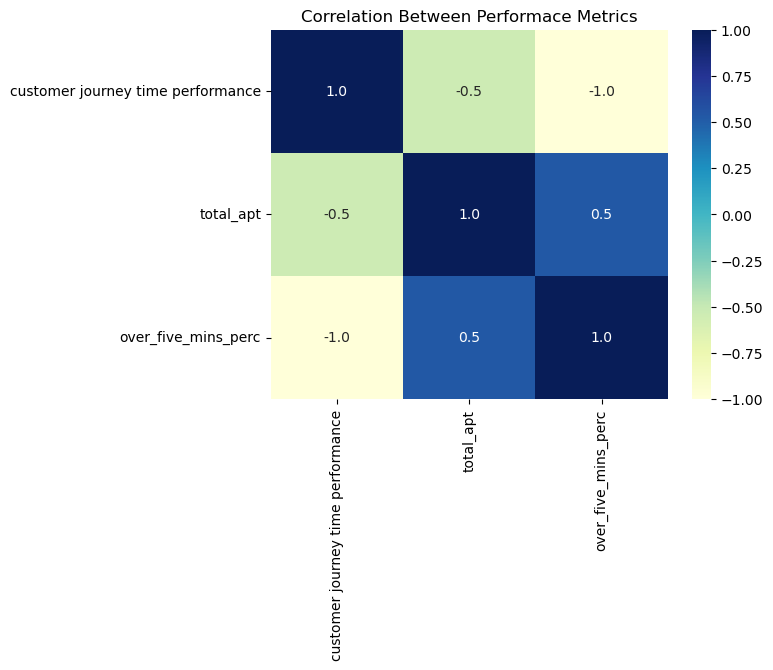

In [68]:
# heatmap of the correlation
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Correlation Between Performace Metrics")
plt.show()

## How did passenger experience (measured by delays and journey time performance) change over subway lines and time?

Passenger experience, measured by Customer Journey Time Performance and delay metrics, improved from the years 2015 to 2024. During the 2020 COVID-pandemic, MTA activity dropped significantly, which was reflected in a temporary decline in delays. However, when comparing the pre-COVID and post-COVID periods, improvements in service quality is revealed.

Subway lines varied in performance, with some lines consistently underperforming, while others, such as the L line, maintained high performance, with CJTP values of around 90%. The Pearson's correlation coefficient between waiting over five minutes and Customer Journey Time Perfromace was -1, indicating a strong negative correlation. This implies that the more a person waits on the platform for the train, the lower the CJTP. Reducing these delays would greatly improve rider experience across the train system.